# Assignment 1. House Pricing.

You are given a dataset of house prices.

Your goal is two fold:
1. Perform exhaustive Exploratory Data Analysis (EDA)
2. Build a simple machine learning model (regression) using appropriate cross-validation procedure. Task is to predict **house price**.

This notebook will guide you through, let's start!

----

We are using house sale price data from King County, Wahington, USA. This dataset is in public domain and can be obtained from Kaggle: https://www.kaggle.com/harlfoxem/housesalesprediction

Alternatively, from here: https://github.com/dbendet/coursera_machine_learning/blob/master/kc_house_data.csv

You need to place `kc_nouse_data.csv` file in the same directory as this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Loading data

As always in Data Science you are starting with making nice cup of tea (or coffee). Your next move is to load the data:

- Start with loading `house_data.csv` file using `pd.read_csv()` function. Store the loaded data in the `data` variable
- You may also want to increase maximal displayed pandas columns: set `pd.options.display.max_columns` to 30
- Print top 10 observations in the table.
- Print last 10 observations in the table.
- Print all the data columns names using method `.columns`
- Print data size (number of rows and columns)

**Hint 1** Every Python has a `head` and a `tail` just as DataFrames do.

In [2]:
# Load the data
data = pd.read_csv('kc_house_data.csv')


In [3]:
# Observe top 10 observations
data.head(11)
# your code here

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
# Observe last 10 observations
data.tail(11)
# your code here

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21602,844000965,20140626T000000,224000.0,3,1.75,1500,11968,1.0,0,0,...,6,1500,0,2014,0,98010,47.3095,-122.002,1320,11303
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
# Increase maximal displayed columns
pd.options.display.max_columns = 30 
# your code here

In [6]:
# Observe top 10 observations again
data.head(11)
# your code here

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
# That's an an example of graded cell.
# Important: the name of the variable should be exactly the same as prefilled one 
# [Graded] Create a variable containing all the columns/features names

data_columns = list(data)
# your code here

In [8]:
# Grading

In [9]:
print(data_columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [10]:
# [Graded] Create a variable containing the shape of the data matrix

data_shape = data.shape
# your code here

In [11]:
# Grading

### 2. Simple statistics

Lets do some basics:
- Count number of not NaN's in every column.
- Is there any missing values in the data?
- Count number of unique values in every column. 
- What does this tell you about the features, which are most likely categorical and which are most likely numerical?
- Use pandas `.describe()` to display basic statistic about the data.
- Could you spot any sucpicious columns?

In [12]:
# Count number of not NaN's in every column
data.count()
# your code here

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [13]:
# [Graded] How many columns have missing values in them?
n_missing = np.count_nonzero(data.isnull().sum())
# your code here

In [14]:
# Grading


In [15]:
# Count number of unique values in every column
data.nunique()

# your code here

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [19]:
# [Graded] What feature has the lowest number of unique values?
n_unique_min = data_columns[list(data.nunique()).index(min(data.nunique()))]
# your code here

waterfront


In [ ]:
# Grading

In [20]:
# Display basic data statistics
data.info()
# your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.4+ MB


### 3. Not so simple statistics

You have heard that **correlation** has something to do with feature predictiveness or, not?
Any way you decided to print correlation between every column in your data:

- Create a table of pairwise correlations between columns. Store it in the `correlation` variable
- What could you say about size of this table?
- Is there any missing columns? Why?
- Which features are mostly correlated with the `price`?

**Hint 1** Try out this method https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

**Hint 2** You could actually save the result to another variable, to check its properties!

In [21]:
# Create a correlation matrix
C = data.corr()
# your code here

In [22]:
# [Graded] What is the shape of the correlation matrix? Output a list or a tuple containing it's dimensions

correlation_shape = C.shape
# your code here

In [23]:
# Grading


In [24]:
# Print its columns
C_columns = list(C)

# your code here

In [25]:
# Print columns of the original data, what's missing, why?
list(data)
# date is not a number
# your code here

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [26]:
# [Graded] Provide the name of the missing column

missing_column = set(list(data)) - set(list(C))
# your code here

In [27]:
# Grading

In [28]:
# Print correlation table, elaborate on price correlated features
price_cor = C.loc[:, 'price']
# your code here

In [29]:

C_columns.append(C_columns.pop(C_columns.index('price')))


In [30]:
# [Graded] Output the name of the feature that has the highest correlation with 'price'

highest_corr = C_columns[list(price_cor.drop(['price'])).index(max(price_cor.drop(['price'])))]
# your code here

In [31]:
# Grading

### 4. Data cleaning

For your basic analysis you decide not to use column `zipcode`. You also decided to set column `id` as your data index:
- Drop column `zipcode`
- Set column `id` to be your data index

Important, please keep the name 'data' for the transformed data set

In [32]:
# your code here

In [33]:
# [Graded] drop column zipcode
data = data.drop('zipcode', axis=1)

# your code here

In [34]:
# [Graded] set data index
data = data.set_index(['id'])

# your code here

In [35]:
# Display top 10 observation from your data
data.head(11)

# your code here

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113


In [36]:
# Grading

### 5. Basic date processing

You figure out that column `date` is to harsh for you, so you decided to convert it to plausible format:

- Use pandas method `to_datetime()` to convert the date to a good format.
- Exctract `year`, `month`, `day` and `weekday` from your new date column. Save them to separete columns.
- How many columns has your data now?
- Drop column `date`.


**Hint 1** for datetime formatted date you could extract the `year` as follow:
```
data.date.dt.year
```
**Hint 2** You could create new column in a DataFrame as follow:
```
data["new_column"] = 
```

**Offtop** Very often date could be a ridiculously rich feature, sometimes it is holidays that matters,

sometimes weekends, sometimes some special days like **black friday**. Learn how to work with date in Python!

In [37]:
# Convert date to datetime format
data["date"]= pd.to_datetime(data["date"]) 
# your code here

In [38]:
# Extract and store year
data["year"] = data.date.dt.year
# your code here

In [39]:
# Extract and store month
data["month"] = data.date.dt.month
# your code here

In [40]:
# Extract and store day
data["day"] = data.date.dt.day
# your code here

In [41]:
# Extract and store weekday
data["weekday"] = data.date.dt.weekday
# your code here

In [42]:
# Drop column date
data = data.drop('date', axis=1)
# your code here

In [43]:
# Display top 10 observations
data.head(11)
# your code here

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day,weekday
id,,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13,0
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9,1
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25,2
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9,1
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18,2
7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5,12,0
1321400060,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819,2014,6,27,4
2008000270,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711,2015,1,15,3
2414600126,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,2015,4,15,2


In [44]:
# [Graded] What is the size of our data after these operations? Output dimensionality of your data after date processing.

data_shape = data.shape

# your code here

(21613, 22)

In [45]:
# Grading

# Ok, enough with boring routine, time to Draw!

### 6. Plot a histogram.

You are going to predict `price` and you already know its basic statistics (min, max, mean, std, 25%, 50%, 75% quantiles), but what about the whole distribution?

- Plot distribution histogramm of column `price`. Use plt.hist()
- What are 3 arrays that plt.hist() returns (aside from the actual plot)?
- Save these arrays to some variables
- Increase number of bins in your histogram up to 30-50
- What could you say about price distribution? Does it looks unimodal? Skewed to the right/left? Elaborate.

**Hint** you could rotate your xtick, check this out https://matplotlib.org/3.1.1/gallery/ticks_and_spines/ticklabels_rotation.html

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

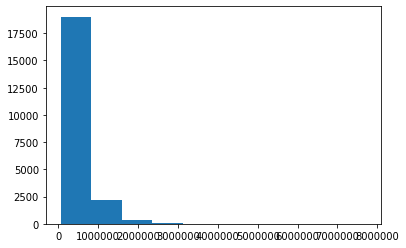

In [46]:
# Use plt.hist() to plot distribution of the price column
plt.hist(data.loc[:, 'price'])
# your code here

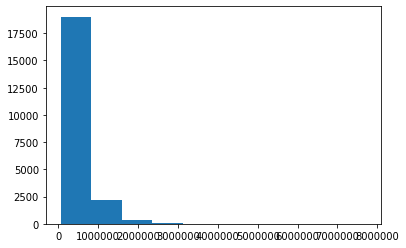

In [47]:
# Store returned arrays of plt.hist() to some variables
N_array, P_array, Patches = plt.hist(data.loc[:, 'price'])
# your code here

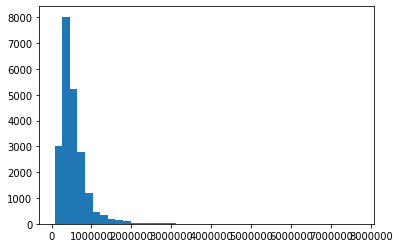

In [48]:
# Increase number of bins, plot histogram again
N_array, P_array, Patches = plt.hist(data.loc[:, 'price'], bins=40)
# your code here

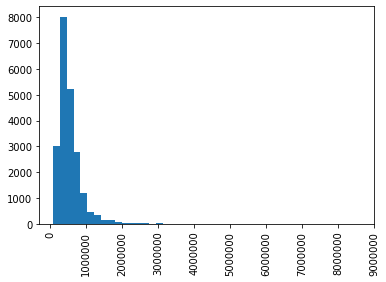

In [49]:
# Rotate xticks, plot a histogram
N_array, P_array, Patches = plt.hist(data.loc[:, 'price'], bins=40)
locs, labels = plt.xticks()
plt.xticks(locs[1:], rotation='vertical')
plt.show()
# your code here

### 7. Customize your plot

Plot is no good without a 
- Reasonable title
- Appropriately labeled x and y axis

Add them.

**Hint** most of customization is added via `plt.` e.g. 

```
plt.title('Title')
```

Text(0.5, 1.0, 'Price Distribution')

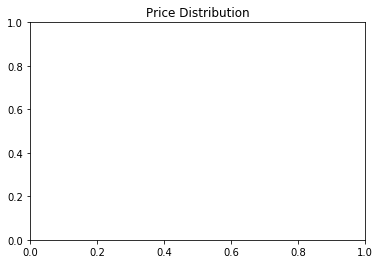

In [50]:
# add title to your histogram
plt.title('Price Distribution')
# your code here

Text(0.5, 0, 'Price')

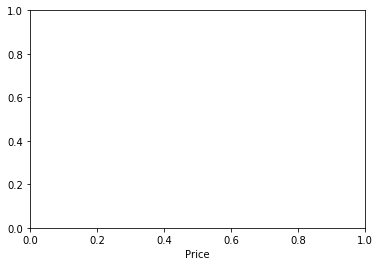

In [51]:
# Label your x axis
plt.xlabel('Price')
# your code here

Text(0, 0.5, 'Amount')

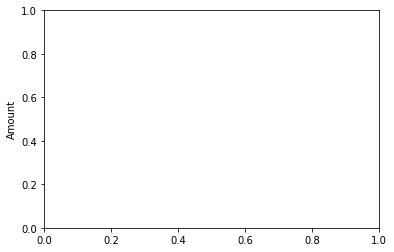

In [52]:
# Label your y axis
plt.ylabel('Amount')

# your code here

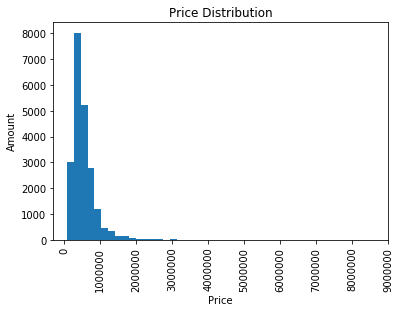

In [53]:
N_array, P_array, Patches = plt.hist(data.loc[:, 'price'], bins=40)
plt.title('Price Distribution')
plt.ylabel('Amount')
plt.xlabel('Price')
locs, labels = plt.xticks()
plt.xticks(locs[1:], rotation='vertical')
plt.show()


### 8. Plot a scatter plot

Based on a correlation table you decided to plot a scatter plot to check out dependency between price and its most correlated features.

- Choose a single most correlated with price feature.
- Plot a scatter plot (`plt.scatter()`) dependency between price and this feature.
- Label axis, add title.
- Elaborate on the picture.

**Hint** Take your correlation table and sort rows in column `price`

In [54]:
# Choose a feature
X=data.loc[:,highest_corr]
y=data.loc[:,'price']
# your code here

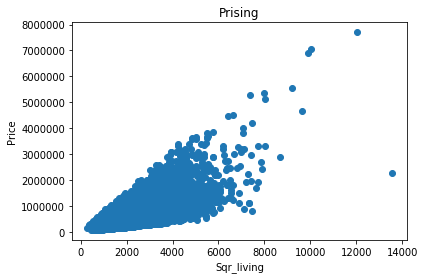

In [55]:
# Plot a scatter plot, dont forget to specify x,y label and a title
plt.scatter(X,y)
plt.title('Prising')
plt.ylabel('Price')
plt.xlabel('Sqr_living')
plt.show()
# your code here

### 9. More data cleaning

Based on the histogram and scatter plot you decided to remove outliers,
for the purpose of our work removing top 1% (above 99th quantile),
would be enough.

- compute 99th **price** quantile
- remove all observations >= 99th **price** quantile

**Hint** you could take a subset of a data using boolean mask, like this:

```
condition = data.col > 5
data[condition]
```

In [56]:
# compute price 99th quantile
condition = data['price'] < data['price'].quantile(.99)
data = data[condition]

# your code here

In [57]:
# print number of rows in the data
len(data.index)
# your code here

21396

In [58]:
# compute price 99th quantile
data['price'].quantile(.99)
# your code here

1600000.0

In [59]:
# [Graded] Compute number of rows and columns in your data after these operations

data_shape = data.shape

# your code here

In [60]:
# Grading

### 10. Customize scatter plot

Lets plot our scatter again, but now lets add some fancy stuff start with increasing the visual size of the plot:

- Increase figure size (check out `plt.figure()` parameters)
- Reduce size of individual scatter point to `5`
- Change color of the points to red 

**Hint 1** Check out plt.scatter() parameters

**Hint 2** You could also customize marker style, e.g. change points to triangles/squares or even small stars.

**Colors** https://matplotlib.org/2.0.2/api/colors_api.html

**Markers** https://matplotlib.org/3.1.1/api/markers_api.html

In [61]:
# Increase figure size
plt.figure(figsize=(16,9))
# your code here

<Figure size 1152x648 with 0 Axes>

<Figure size 1152x648 with 0 Axes>

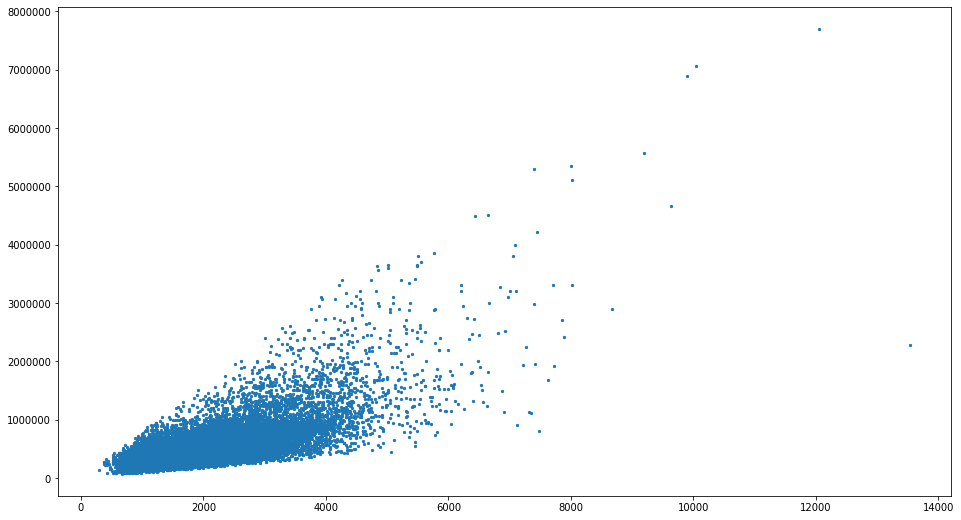

In [62]:
# Set marker size to 5
plt.figure(figsize=(16,9))
plt.scatter(X,y,s=5)
# your code here

c:\users\dg\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  app.launch_new_instance()


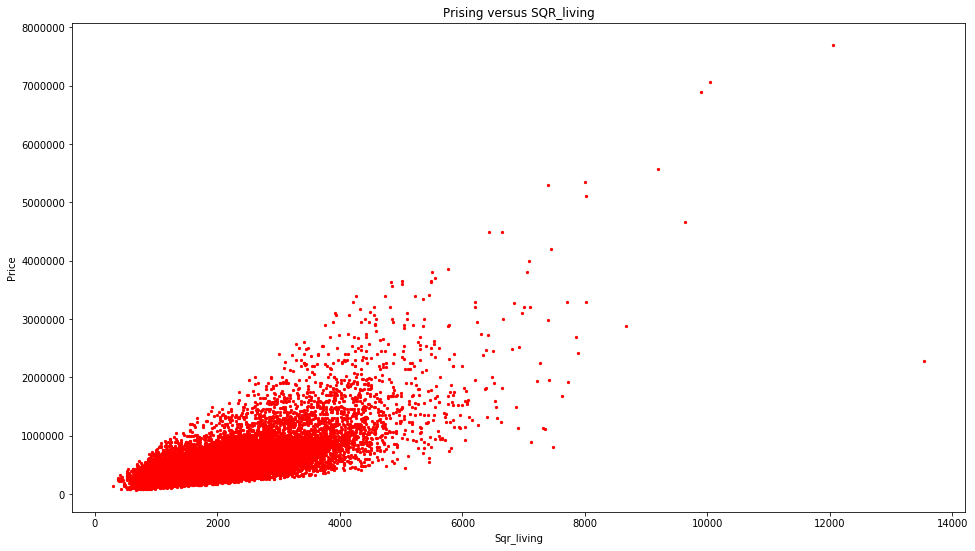

In [63]:
# Change points color
plt.figure(figsize=(16,9))
plt.scatter(X, y, s=5, c = 'R')
plt.title('Prising versus SQR_living')
plt.ylabel('Price')
plt.xlabel('Sqr_living')
plt.show()
# your code here

### 11. More on color

You remebered that there were a `grade` feature also highly correlated with `price`, but unfortunatly 
qualitative. You have heard somewere that you could set points color using qualitive feature:
```
color = [1,1,1,0,0,0]
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]
plt.scatter(x,y,c=color)
```

Original `grade` has too much variability. Create a new column that takes values:

- 1 if grade 1-3
- 2 if grade 4-7
- 3 if grade 8-10
- 4 if grade 11-13

and use it as color for previous scatter plot:

- Make a rough version of data.grade, add it as a new column to your data
- Plot a scatter plot with points colored according to your new column
- Use cmap option, of a plt.scatter()
- Explain what does cmap option controls
- Elaborate on the resulting picture

**Hint** check out pandas `map` or pandas `apply` function

**cmaps** https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [64]:
# Create rough version of grade
def new_grade_function(grade):
 g = np.NAN
 if (grade >= 1) & (grade < 4):
     g = 1
 elif (grade >= 4) & (grade < 8):
     g = 2
 elif (grade >= 8) & (grade < 11):
     g = 3
 elif (grade >= 11) & (grade < 14):
     g = 4
 return g
 
data['Grade_new'] = list(map(new_grade_function, list(data['grade'])))
# your code here

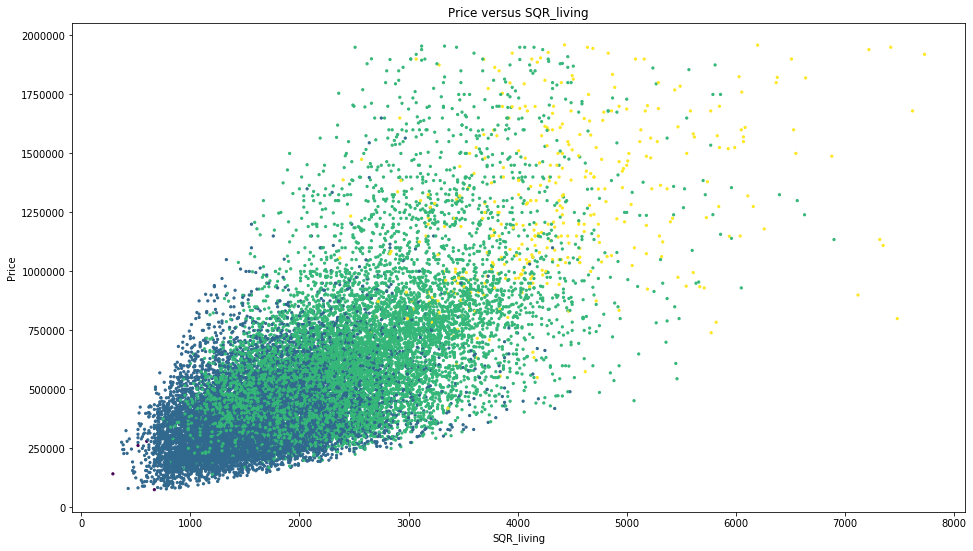

In [65]:
# Change points color according to a rough grade
plt.figure(figsize=[16, 9])
colors = list(data['Grade_new'])
plt.scatter(data.loc[:,highest_corr], y=data.loc[:,'price'], s=5, c=colors)
plt.title('Price versus SQR_living')
plt.ylabel('Price')
plt.xlabel('SQR_living')
plt.show()
# your code here

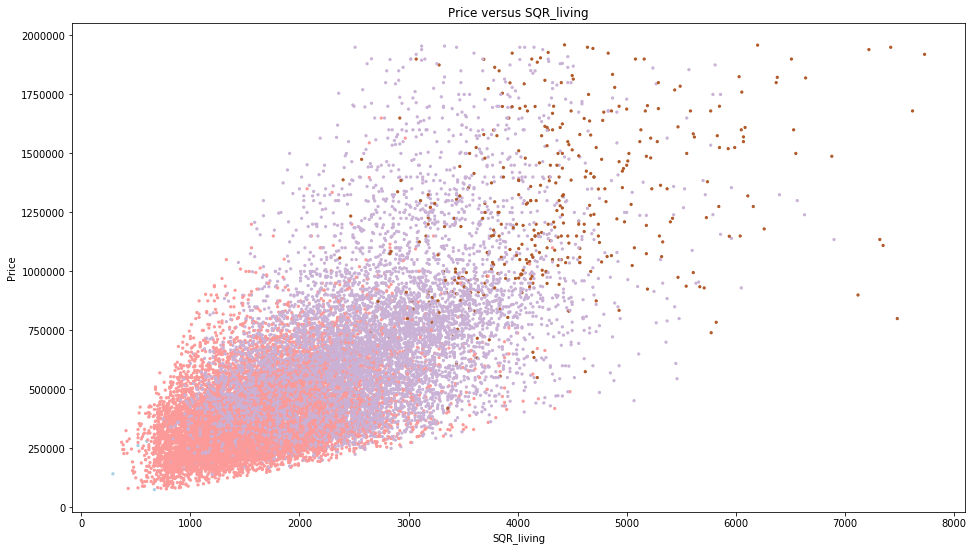

In [66]:
# Change cmap to Paired
plt.figure(figsize=[16, 9])
colors = list(data['Grade_new'])
plt.scatter(data.loc[:,highest_corr], y=data.loc[:,'price'], s=5, c=colors, cmap='Paired')
plt.title('Price versus SQR_living')
plt.ylabel('Price')
plt.xlabel('SQR_living')
plt.show()
# your code here
# Cmap's mission is to change the color map based on input arguments

In [67]:
# Grading

# Seaborn

Seaborn is a wrap around matplotlib, along with pandas it allows you to build cleaner plots
much easier. 

But in the end it is just a wrap, if you want flexibility you need to go back to matplotlib.

Check their example gallery https://seaborn.pydata.org/examples/index.html it is awesome!

### 12. Box plot

Lets switch to something else, number of bathroom sounds important to a price.
We could plot a boxplot of prices for every unique value of bathrooms.

And with `seaborn` we could do it in 1 single line!

- Plot a boxplot of prices for every unique value of bathrooms using seaborn.boxplot
- Increase figure size to make picture looks better
- Elaborate on the resulting picture

**Hint** check out seaborn documentation on boxplots https://seaborn.pydata.org/examples/grouped_boxplot.html

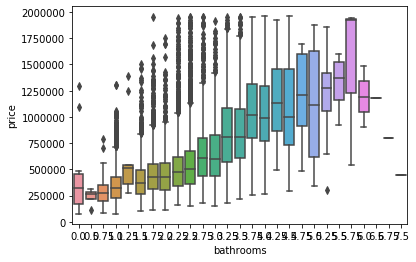

In [68]:
# Plot boxplots
import seaborn as sns
sns.boxplot(x='bathrooms', y="price", data=data)
# your code here

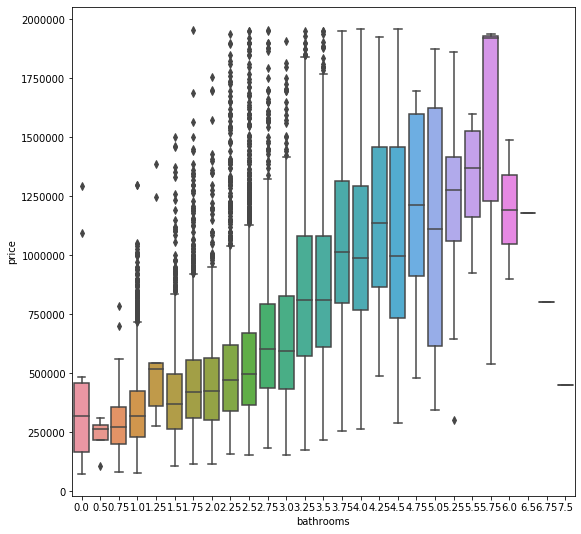

In [69]:
# Increase figure size
plt.figure(figsize=(9,9))
sns.boxplot(x='bathrooms', y="price", data=data)
plt.show()
# your code here

In [70]:
# Elaborating part: it is clear that price getting bigger with increasing number of bathrooms

### 13. Bar chart

Waterfront is a rare feature, does it strongly affect price?

To answer this question you decided to plot `bar chart` of
price of houses with and without `waterfront`:

- Count number of houses **with** waterfront
- Plot seaborn categorical plot. Use this example https://seaborn.pydata.org/examples/grouped_barplot.html as a guide.
- Elaborate on the resulting picture.


In [71]:
# Count number houses with waterfront
num_wat = data.waterfront.count()

# your code here

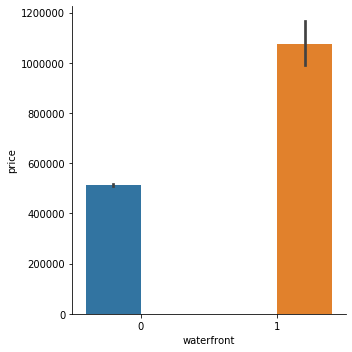

In [72]:
# plot the picture
g = sns.catplot(x='waterfront', y='price', hue='waterfront', kind='bar', data=data)
# your code here

In [73]:
# Elaborating part: houses with waterfront cost more (because bar plot estimates the central tendency of price with uncertanty shown by black line on the top of the bar) 

### 14. Line plot

Remember your last time renting an apartments? When does it happen, summer? winter? Season could strongly affect

house prices. Lets check this out.

- Plot a line chart: price dependency on month
- Fix figure sizes if needed
- Fix xticks (set the to be `1..12`)
- Fix xticklabels to be actual month's names and not numbers (remember to rotate them) 
- When does the prices goes up?
- What is the best month to buy a house? (atleast in terms of general trend)
- Does this trend depend on view feature? Plot multiple lines on a single plot.
- Elaborate on the result


**Hint 1** sns.lineplot (aside from a plot) return you an Axes object, which has many different parameters and methods, e.g.:

```
ax = sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)
ax.set_xticks(list(range(0, 20)))
```

Color pallete https://seaborn.pydata.org/tutorial/color_palettes.html

Line plot docs https://seaborn.pydata.org/generated/seaborn.lineplot.html

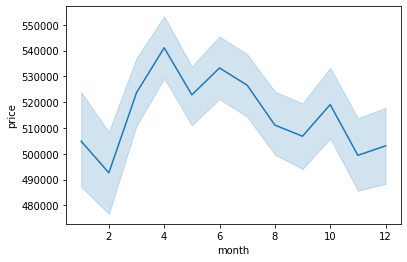

In [74]:
# Plot a line chart
sns.lineplot(x="month", y="price", data=data)
# your code here

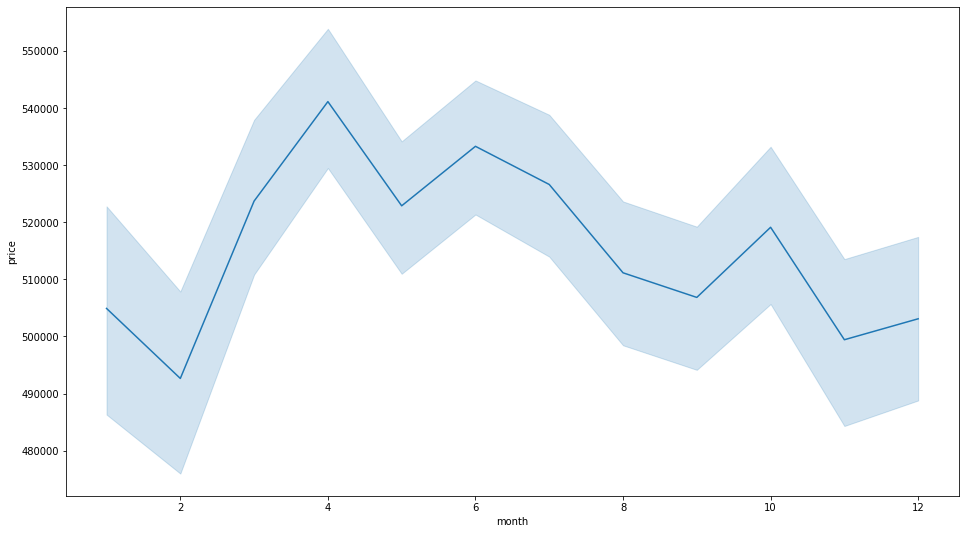

In [75]:
# Fix figure size
plt.figure(figsize=(16,9))
sns.lineplot(x="month", y="price", data=data)
# your code here

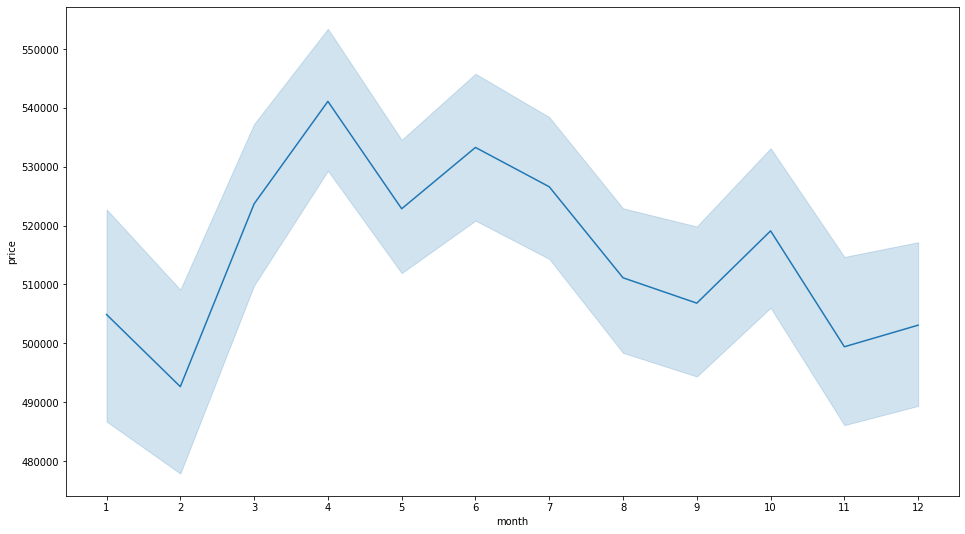

In [76]:
# Fix xticks
plt.figure(figsize=(16,9))
ax = sns.lineplot(x="month", y="price", data=data)
ax.set_xticks(list(range(1, 13)))
plt.show()
# your code here

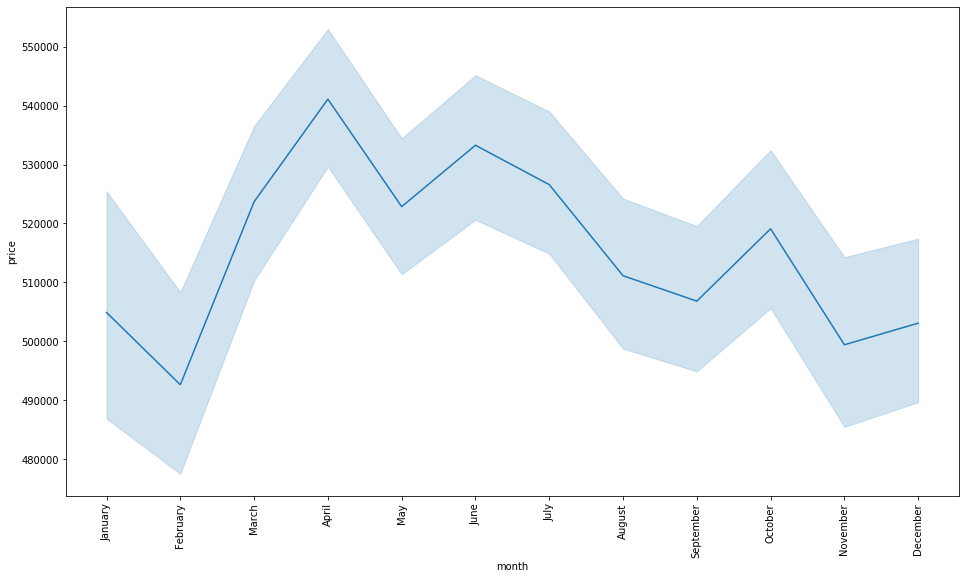

In [77]:
# Fix xticks labels
plt.figure(figsize=(16,9))
ax = sns.lineplot(x="month", y="price", data=data)
plt.xticks(list(range(1, 13)), rotation='vertical')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()
# your code here

In [78]:
# [Graded] What is the best month to buy a house? (explanation is below)

best_month = 'February'

# your code here

In [79]:
# Grading


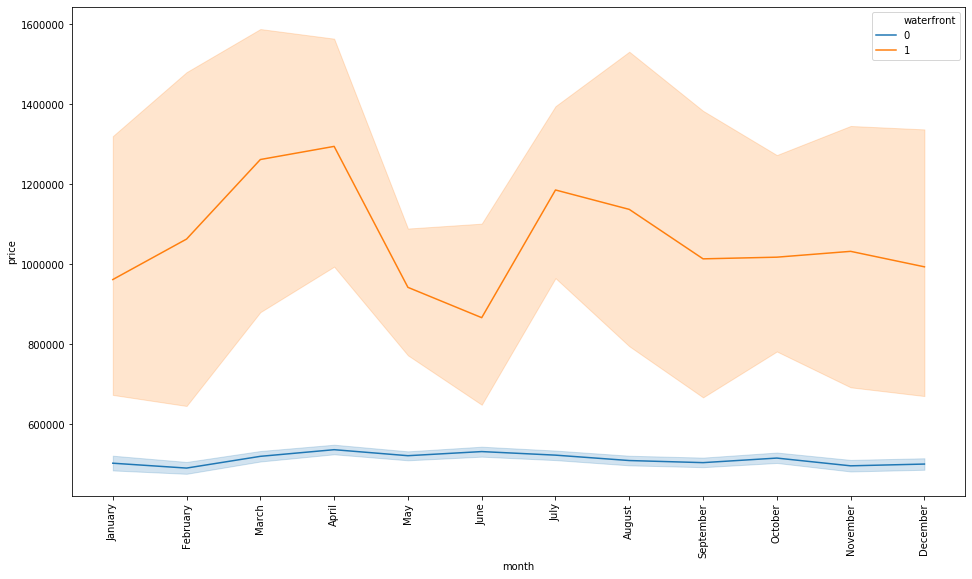

In [80]:
# Plot multiple lines on a single plot (view feature - WATERFRONT)
plt.figure(figsize=(16,9))
ax = sns.lineplot(x="month", y="price", hue = 'waterfront', data=data)
plt.xticks(list(range(1, 13)), rotation='vertical')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()
# your code here

In [81]:
# Elaborating part: The best month to buy a house - the month with the lowest price (February)
# Price increases with the temperature outside :) (Winter<Spring<Summer>Autumn)
# Chosen feature - Waterfront. You can see that changing in price is more dramatic and sensitive in case of less cheap houses 
# with waterfront. You can also see similar distributions with hue='Grade_new'. Chosen Feature matters.

# Say no more, Machine Learning!

### 15. Prepare data from training machine learning models.
For this task we will try to predict the house price, so our target feature is `price`.

- Separate features and target.
- Split the data into train (`80%` of the data) and test (`20%` of the data). 
- Use random_state parameter = $42$.
- What does fixing random_state do?

**Hint 1** Most of the train-testing routines are in the `sklearn` submodule `model_selection`

In [82]:
# Separate features and the target (price)
X = data.drop('price', axis = 1)
y = data.loc[:,'price']
# your code here

In [83]:
# import train_test_split from sklearn model_selection submodule,
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = None, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)# your code here

(17116, 22) (4280, 22) (17116,) (4280,)


In [84]:
# [Graded] How many objects are in the training part of the data?

X_train.count()[1]
# your code here

17116

In [85]:
# Grading

### 16. Train your first model.

Since this is a regression task you decided that the Linear Regression will do the job:

- Create a Linear Regression class. Leave all parameters by default.
- Fit the model with the **training data**.
- Predict house prices of the **test data** (which were not seen by the model).
- Predict house prices of the **train data**.
- Report model perfomance in terms of `Mean Squared Error` on **train** and **test data**.
- Check metrics which compute relative error. Start with `R2 coefficient` on **train** and **test data.**

**Hint 1** Check out `sklearn.metrics` module.

In [86]:
# make all imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


In [87]:
# Create a linear model

clf = LinearRegression()

In [88]:
# Train the linear model
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
# Make predictions on train and test data
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
# your code here

In [90]:
# [Graded] Report MSE of both train and test predictions

mse_lr_test = mean_squared_error(y_pred_test, y_test)
mse_lr_train = mean_squared_error(y_pred_train, y_train)
print(mse_lr_train, mse_lr_test)
# your code here

23185745846.961857 23455709505.44846


In [91]:
# Grading

In [92]:
# [Graded] Report R2 score of both train and test predictions
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)
print(r2_score_train, r2_score_test)
# your code here

0.7149603559111748 0.705073964115848


In [93]:
# Grading

### 17. Standardize your data.

You remebered that either Max or Mikhail told you, that for building a linear model **data normalization** is essential. But you completely forgot about it. Lets fix this.


> Standardization is a linear transformation that is applied to each feature independently.
First, mean $\hat{\mu_i}$ and variance $\hat{\sigma_i}$ of the $i$-th feature are estimated, after that we subtract the mean from every value and divide the result by variance:

$$\frac{x_{ij}-\hat{\mu_i}}{\hat{\sigma_i}}$$

>After that, each feature will have zero mean and variance of 1. This operation needs to be performed on the train data first, and then the same means and variances are to be used to modify the test set. This way we will not introduce any _leaks_ of information about the data in our test set.

Your goal is to Normalize (or Standartize) your data:

- Standartize your **train** data.
- Apply transformation to your **test** data.
- Fit the model again (using training data).
- Predict the housing prices on the **train** and **test data**.
- Does the scaling improve preformance?

**Hint** `sklearn.preprocessing` has multiple standartizing options, for this task you are suppose to use  `StandardScaler` preprocessing transformation.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing


In [94]:
# import a scaler
from sklearn.preprocessing import StandardScaler
# your code here

In [95]:
# Standartize your train data
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)

# X_train_scaled = sc.fit_transform(X_train)
# your code here

In [96]:
# Apply the same transform on your test data
X_test_scaled = sc.transform(X_test)

# your code here

In [97]:
# Fit the Linear model again on scaled data
clf_scaled = LinearRegression()
clf_scaled.fit(X_train_scaled, y_train)
# your code here

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
# [Graded] Make predictions

mse_lr_train_scaled = mean_squared_error(clf_scaled.predict(X_train_scaled), y_train)
mse_lr_test_scaled = mean_squared_error(clf_scaled.predict(X_test_scaled), y_test)
# your code here

23187379325.745926 23441064025.982967 [-1.60322364e+04  2.41098678e+04  9.64310167e+16  1.02180249e+04
  1.29842883e+04  1.87206486e+04  3.04909317e+04  2.20306336e+04
  1.14007773e+05 -8.83939396e+16 -4.82908367e+16 -6.03726743e+04
  1.02052243e+04  7.73181037e+04 -9.85911452e+03  3.44713348e+04
 -9.51272221e+03  1.37029833e+04  2.50241416e+03 -4.37824081e+02
  5.87671924e+02 -1.07085173e+04]


In [99]:
# Grading

### 18. Diffent types of models and scaling.

Along with simple Linear Regression (Ordinary Least Squares), you have seen two additional algorithms that fit a linear refression model to the data:
- Ridge Regression
- Lasso Regression.

Lets see how they react to the scaling of the data.

- Fit separate Ridge and Lasso models on normalized data
- Compare their perfomances

To make your life easier you are suggested to write 2 functions:
 - `report_mse`
 - `evaluate_model`

You will find their description below.


**Hint** for the `evaluate_model` you just need to put appropriate steps from **tasks 16, 17** inside a function.

Use parameter $\alpha=10^4$.

In [100]:
def report_mse(model,  X , y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_pred, y)
    return mse

In [101]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scale=False):
       
    if scale :
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        
    model.fit(X_train,y_train)
    mse_train = report_mse(model, X_train, y_train)
    mse_test = report_mse(model, X_test, y_test)
    
    # your code here
    
    return mse_train, mse_test

In [102]:
# make imports

from sklearn.linear_model import Ridge, Lasso
# your code here

In [103]:
# [Graded] fit Ridge regression model on scaled data and evaluate it
model_Ridge = Ridge(alpha = 1e+4)

mse_ridge_train_scaled = evaluate_model(model_Ridge, X_train_scaled, y_train, X_test_scaled, y_test)[0]
mse_ridge_test_scaled = evaluate_model(model_Ridge, X_train_scaled, y_train, X_test_scaled, y_test)[1]
print(mse_ridge_train_scaled ,mse_ridge_test_scaled )
# your code here

26298388716.857536 26569136446.106266


In [104]:
# your code here

In [105]:
# [Graded] fit Lasso regression model on scaled data and evaluate it
model_Lasso = Lasso(alpha = 1e+4)

mse_lasso_train_scaled = evaluate_model(model_Lasso, X_train_scaled, y_train, X_test_scaled, y_test)[0]
mse_lasso_test_scaled = evaluate_model(model_Lasso, X_train_scaled, y_train, X_test_scaled, y_test)[1]
print(mse_lasso_train_scaled ,mse_lasso_test_scaled )
# your code here

24405352879.507496 24790057082.53809


In [106]:
# Grading

In [107]:
data.shape

(21396, 23)

### 19. Analyzing trained models.

You decided to look inside your regressor and try to interpret the obtained coefficients. It is not always easy with machine learning models, but linear models provide easy explanations: the bigger the coefficient before a feature the bigger the importance of this feature for the prediction.

> Coefficients of the linear model are easily interpretable:
$$
y = \theta_1 x + \theta_0
$$
> Increasing $x$ by $1$, will increase $y$ by $\theta_1$


- Examine coefficients of the trained Linear Regression model on original data. Plot a horizontal bar chart of feature importance. Customize a plot appropriatly.
- What are the three largest coefficients by absolute value? What features do they correspond to?
- Repeat these steps on normalized data
- Compare the results.



**Hint 1** use `.coef_` attribute of the trained model to access the raw coefficients values.

**Hint 2** use `plt.barh`:

```
plt.barh(X.columns, model.coef_)
```

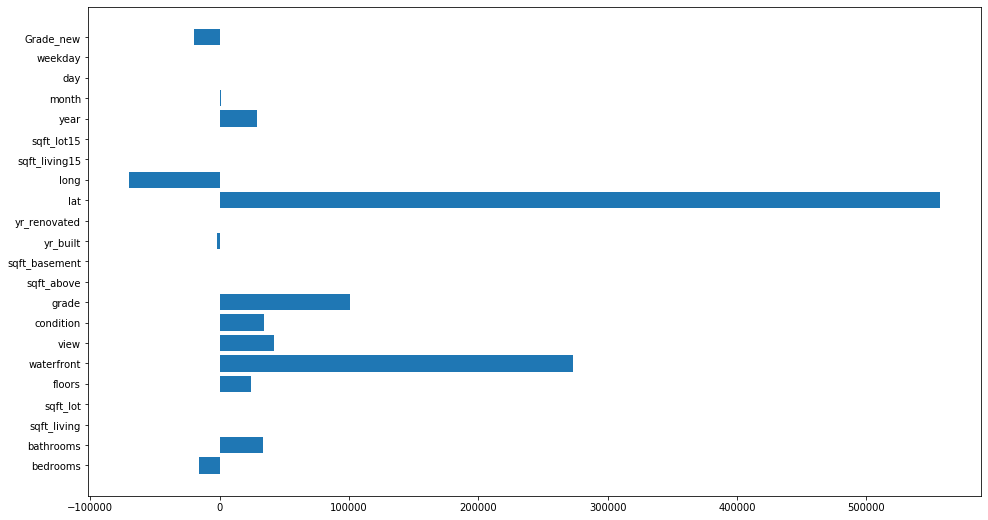

In [108]:
# You should already have trained linear model on unnormalized data
# Plot a bar chart of feature importances
plt.figure(figsize=(16,9))
plt.barh(X_train.columns, clf.coef_)
plt.show()
# your code here

In [109]:
# [Graded] Print names of 3 largest coefficients by magnitude
# You might want to write a function for it
# to use it in the future

def max_coef(model, names, k=3): 
    
    ans = {}
    # your code here
    for i in range(k):
     key = model.coef_[np.argsort(np.abs(model.coef_))[-1*(i+1)]]
     ans[key] = names[np.argsort(np.abs(model.coef_))[-1*(1+i)]]
    return ans

model_lr = clf
max_coef_names = max_coef(model_lr, X_train.columns)


In [110]:
# Grading

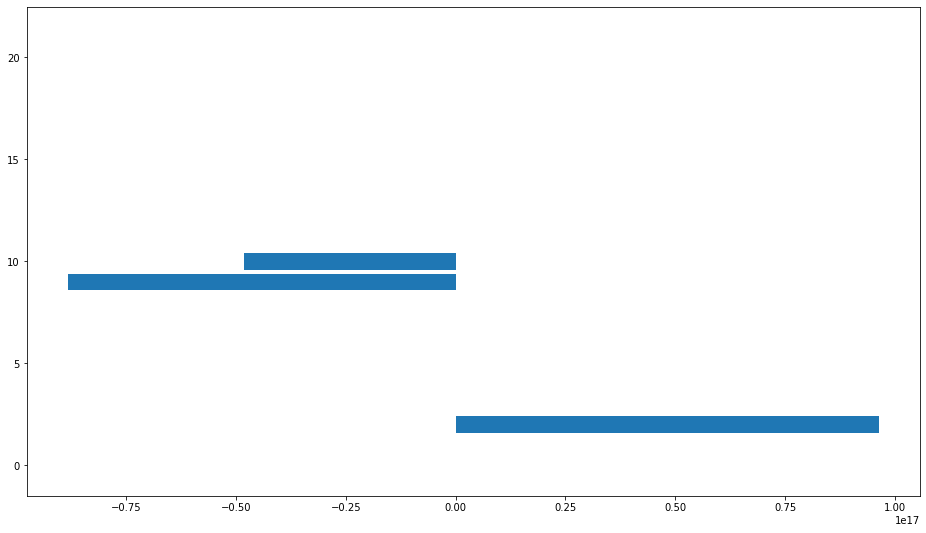

In [111]:
# You should already have trained linear model on normalized data
# Plot a bar chart of feature importances
plt.figure(figsize=(16,9))
plt.barh(pd.DataFrame(X_train_scaled).columns, clf_scaled.coef_)
plt.show()
# your code here

In [112]:
# [Graded] This time, find 3 largest coefficients by magnitude for the model trained on the *scaled* data

max_coef_names_scaled = max_coef(clf_scaled, X_train.columns)
print(max_coef_names_scaled)
# your code here

{9.64310167120192e+16: 'sqft_living', -8.83939395677899e+16: 'sqft_above', -4.829083669261552e+16: 'sqft_basement'}


In [113]:
# Grading

### 20. Explore effects of regularization on the coefficients.

Your goal is to compare how Ridge and Lasso affects model coefficients. 


- Fit **Ridge Regression** and **Lasso models** on the **scaled train data**, using parameter $\alpha = 10^4$.
- What does parameter $\alpha$ stands for? (in **Lasso** and **Ridge**) 
- Report three largest coefficients (by absolute value) for each model.
- What features do they correspond to? 
- Are they different from what we got from the simple **Linear Regression** earlier?
    - Compare coeficients magnitude (plot a bar plot)
    
- How many non-zero coefficients are there in the trained **Lasso** and **Ridge** models?

**Hint 1** use `np.nonzero()` function

**Hint 2** You could plot barh using pandas interface https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html

In [114]:
# Fit the models
Lasso_fit = Lasso(alpha=1e+4)
Ridge_fit = Ridge(alpha=1e+4)
Lasso_fit.fit(X_train_scaled, y_train)
Ridge_fit.fit(X_train_scaled, y_train)
# your code here

Ridge(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
# Report three largest coefficients of the Ridge

answer_21_1_max_c_ridge = list(max_coef(Ridge_fit, pd.DataFrame(X_train_scaled).columns).keys())

# your code here

In [116]:
# Grading

In [117]:
# Report  three largest coefficients of the Lasso
answer_21_2_max_c_lasso = list(max_coef(Lasso_fit, pd.DataFrame(X_train_scaled).columns).keys())

# your code here

In [118]:
# Grading

In [119]:
print(answer_21_1_max_c_ridge,answer_21_2_max_c_lasso)

[54431.385896530235, 50235.67386208531, 39752.35025368909] [104943.33400715026, 86865.8213023392, 72015.16959509334]


<Figure size 1152x648 with 0 Axes>

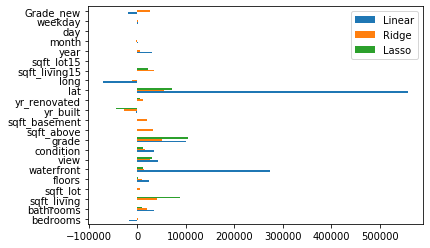

In [120]:
# Compare the results between them and with 
# vanilla Linear Regression results trained earlier
plt.figure(figsize=(16,9))
df = pd.DataFrame({'Linear': clf.coef_,'Ridge': Ridge_fit.coef_, 'Lasso': Lasso_fit.coef_}, index=X_train.columns)
df.plot.barh()
plt.show()
# your code here

In [121]:
# [Graded] How many non-zero coefficients are there in the trained Lasso and Ridge models?
answer_21_3_nz_ridge = np.nonzero(Ridge_fit.coef_)[0].size
answer_21_4_nz_lasso = np.nonzero(Lasso_fit.coef_)[0].size
# your code here

In [122]:
# Grading

### 21. Try a diffent type of model.

Linear is not the only regression model, you could succesfully solve regression problems using our old friend K nearest neighbours.

- Import K Nearest Neoghbors regression model.
- Fit it with train data. Use $k=7$ number of neighbors for your model.
- Report model perfomance on train and test data, which is better, why?
- Do you need to normalize the data for KNN model?
- Elaborate on the result.


**Hint** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [123]:
# make imports
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# your code here

In [124]:
# train the model
clf_KNN = KNeighborsRegressor(n_neighbors=7)
clf_KNN.fit(X_train_scaled,y_train)
# your code here

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [125]:
# Report KNN perfomance
print(report_mse(clf_KNN, X_train_scaled, y_train))
print(report_mse(clf_KNN, X_test_scaled, y_test))
# your code here

14917574689.89016
20604373234.423958


In [126]:
# Have you used normalized or unnormalized data, why?

# I used normalized data because with non-scaled data (in our classification problem) all 7 nearest neighbors will be "concentrated" 
# in the particular direction (of the axis representing the value with the smaller range),  so the classification problem will 
# be hard to solve correctly. Scaling our data allows us to use our 7 neighbors much more efficient and obtain higher accuracy.

In [127]:
# Elaborate on the result, how it is compare to linear models?
# It is significantly better in terms of MSE. Linear model such as Ridge and Lasso have pretty good results, but in our case
# KNN works better

### 22. Cross-Validation. 

You have heard that using so-called **k-fold** procedure is a good idea:

- Estimate performance of Linear Regression and K Nearest Neighbors using **3-fold** cross-validation on **training data**.
- How do the CV-scores compare to the scores on the **test set** that we have obtained previously? 

> When the score estimates obtained using train data only (like the CV score here) are better than on the hold out set, we say that they are _optimistic_. Conversly, if they are lower - _pessimistic_. This terminology stems from the principle that the hold-out set provides the most reasonable estimate of the model's performance on the new data.

>So the idea is the following:
>- Divide data into **train** and **test** (hold-out) parts
>- Using k-fold procedure on **train** set choose model parameters (such as k in KNN, or $\alpha$ in Ridge and Lasso)
>- Estimate model perfomance using **test** set.

**Hint** you can use `cross_val_score` function from `sklearn.model_selection` module but pay attention to its parameters.

**Hint** use scaled data.

In [128]:
# make imports
from sklearn.model_selection import cross_val_score, KFold
# your code here

In [129]:
#kfold = KFold(n_splits=3) 
#cv = kfold.split(X_train_scaled, y_train)
clf_cv_3 = LinearRegression().fit(X_train_scaled, y_train)

In [130]:
# Estimate performance of Linear Regression 3 fold CV on train data

answer_22_1_mse_lr_cv = -cross_val_score(clf_cv_3, X_train_scaled, y_train,scoring = 'neg_mean_squared_error', cv=3).mean()
print(answer_22_1_mse_lr_cv)
# your code here

23270020668.464386


In [131]:
# Grading

In [132]:
# Compare CV perfomance of the linear model with perfomance on test

answer_22_2_mse_lr_test = evaluate_model(clf_cv_3,X_train_scaled, y_train,X_test_scaled, y_test)[1]
print(answer_22_2_mse_lr_test)
# your code here

23441064025.982967


In [133]:
# Grading

In [134]:
clf_KNN_cv_3 = KNeighborsRegressor(n_neighbors=7)


In [135]:
# Estimate performance of KNN 3 fold CV on train data

answer_22_3_knn_cv = -cross_val_score(clf_KNN_cv_3, X_train_scaled, y_train,scoring = 'neg_mean_squared_error', cv=3).mean()
print(answer_22_3_knn_cv)
# your code here

20849144468.38408


In [136]:
# Grading

In [137]:
# Compare CV perfomance of the KNN model with perfomance on test

answer_22_4_knn_test = evaluate_model(clf_KNN_cv_3,X_train_scaled, y_train,X_test_scaled, y_test)[1]
print(answer_22_4_knn_test)
# your code here

20604373234.423958


In [138]:
# Grading

### 23. Tuning hyperparameters with cross-validation.

>You might have already noticed that some parameters of the machine learning algorithm are set beforehand (like number of neighbors in KNN), while others are determined during traing (linear regression weights). The first type of parameters apply to the training process itself and, thus, indirectly influence the second type.
How to select values for them then? Since these parameters are defined before traing, fixed test set some values might work better for the than the others. One of the approaches to setting hyper-parameters is to use cross-validation. Using cross-validation we can get an estimate of the performance for the given cofiguration of the hyper-parameters eithout peeking at the test set. What's left is to consider a set of possible hyper-parameters settings and try them one-by-one, calculating the CV-score. We then select the configuration that performed best, train a model with these hyper-parameters on the full train data and calculate the final score on the test set.


Your task is to find the best value of hyper-parameter $k$ for K Nearest Neighbors algorithm.

- Use 3-fold cross-validation and a **range** $[3, 15]$ for the possible values of $k$.
- Plot a dependency between **k** and **MSE** score.
- Train KNN with best **k** on the whole **train**, predict on **test** and estimate the perfomance.
- Compare **test** MSE score with **CV** MSE score
- Elaborate on the results


**Hint 1** You can use `GridSearchCV` class of `sklearn.model_selection` module to do the work for you.

**Hint 2** Check out `n_jobs` parameter to train faster!

In [139]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': list(range(3, 16))}
clf_k = KNeighborsRegressor()
clf_test = GridSearchCV(clf_k, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [140]:
clf_test.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [141]:
clf_test.cv_results_

{'mean_fit_time': array([0.2166899 , 0.20701337, 0.19599732, 0.20735884, 0.20068932,
        0.19366423, 0.23568122, 0.20999614, 0.20271873, 0.20269028,
        0.20702561, 0.19432998, 0.18166486]),
 'mean_score_time': array([ 9.81755336, 10.06483905,  9.68455577, 11.18814667, 10.07782976,
         9.67121935, 10.68016275, 10.48254482, 11.01414585, 10.50115514,
        11.05150644, 10.23687085, 10.28851946]),
 'mean_test_score': array([-2.33379671e+10, -2.21123420e+10, -2.13748772e+10, -2.10901276e+10,
        -2.08491713e+10, -2.07027631e+10, -2.05671213e+10, -2.05226149e+10,
        -2.04841460e+10, -2.05385175e+10, -2.05182803e+10, -2.05153712e+10,
        -2.06072584e+10]),
 'param_n_neighbors': masked_array(data=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neig

In [142]:
 clf_test.best_params_['n_neighbors']

11

In [143]:
# use GridSearchCV to evalute KNN perfomance with different k

answer_23_1_k = clf_test.best_params_['n_neighbors']

# your code here

In [144]:
# Grading

Text(0, 0.5, 'Mean Squared Error')

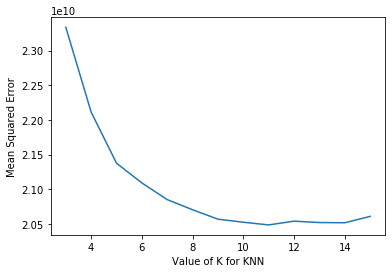

In [152]:
# Plot the dependensy figure

clf_test_mean_scores = pd.DataFrame(clf_test.cv_results_).mean_test_score
plt.plot(range(3,16),-clf_test_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
# your code here

In [153]:
# Evalute best model on test set
answer_23_2_mse = evaluate_model(KNeighborsRegressor(n_neighbors = answer_23_1_k),X_train_scaled, y_train,X_test_scaled, y_test)[1]
# your code here

In [154]:
# Grading

In [155]:
# Compare the test results with CV MSE score
answer_cv = -cross_val_score(KNeighborsRegressor(n_neighbors = answer_23_1_k), X_train_scaled, y_train,scoring = 'neg_mean_squared_error', cv=3).mean()
print('MSE from CV', answer_cv,'; MSE from KNN',answer_23_2_mse)
# As we can see, predicted cv is better (trained) than knn (test) so our result is optimistic

MSE from CV 20484110519.680073 ; MSE from KNN 20632700146.11605


### 24. Tuning regularization parameters with cross-validation.

You decided to tune parameters of your linear models, just as you tune KNN parameter.

> If you look at `sklearn.linear_model` module, you will find `RidgeCV` and `LassoCV` classes. They implement cross-validation on the training data in their `fit` method, so you just need to specify the search domain for $\alpha$ and the scoring rule. Everithing else is done under the hood. After you trained the model, the best value for $\alpha$ will be stored in the `alpha_` attribute of the estimator.


- Find the best regularization parameter for Ridge Regression and Lasso using this method.
- Use $\{10^{-6}, 10^{-5}, ... , 1, 10, ... , 10^6\}$ as possible values for $\alpha$.
- How does the performance of the best models on CV compare to their perfomance on test set?
- Plot a scatter plot of y_pred vs y_true on a test set for Lasso model.
- Elaborate on the result. Does your model overstimate the house prices or understimate them?



**Hint 1** Use 3-fold CV and Mean Squared Error as an error.

**Hint 2** On a scatter plot you could also draw a line `y = x` to help your visual evaluation.

In [156]:
# make imports
from sklearn.linear_model import RidgeCV, LassoCV

# from yellowbrick.regressor import AlphaSelection
# Actualy very nice library for alpha estimation and visualization, but I chose easier way

In [157]:
alp =list(10**i for i in range(-6,7))
clf_R = RidgeCV(alphas=alp, scoring='neg_mean_squared_error', cv =3).fit(X_train_scaled, y_train)


In [173]:
# Fit Ridge model, what is best alpha score?

answer_24_1_ridge_a = clf_R.alpha_
answer_24_2_mse_ridge_best = evaluate_model(Ridge(alpha = clf_R.alpha_,),X_train_scaled, y_train,X_test_scaled, y_test)[1]

# your code here

In [159]:
print(answer_24_1_ridge_a, answer_24_2_mse_ridge_best)

10.0 23455361048.508186


In [161]:
# Grading

In [162]:
# Grading

In [163]:
clf_L = LassoCV(alphas=alp, cv =3).fit(X_train_scaled, y_train)

In [189]:
# Fit Lasso model, what is best alpha score?

answer_24_3_lasso_a = clf_L.alpha_
answer_24_4_mse_lasso_best = evaluate_model(Lasso(clf_L.alpha_), X_train_scaled, y_train, X_test_scaled, y_test)[0]
# your code here

In [165]:
print(answer_24_3_lasso_a, answer_24_4_mse_lasso_best)

100.0 23269781747.07544


In [166]:
# Grading

In [167]:
# Grading

In [187]:
# Compare best Ridge model perfomance on CV and on a test set
print('CV score:',-cross_val_score(Ridge(clf_R.alpha_), X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3).mean(),'; Test set score:',answer_24_4_mse_lasso_best)


CV score: 23269617340.821568 ; Test set score: 23186209609.19225


In [188]:
# Compare best Lasso model perfomance on CV and on a test set
print('CV score:',-cross_val_score(Lasso(clf_L.alpha_), X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3).mean(),'; Test set score:',answer_24_2_mse_ridge_best)

CV score: 23268696906.18816 ; Test set score: 23455361048.508186


In [ ]:
# As we can see, test set score is not obligatory larger than CV score, complicated methods not always provide better results

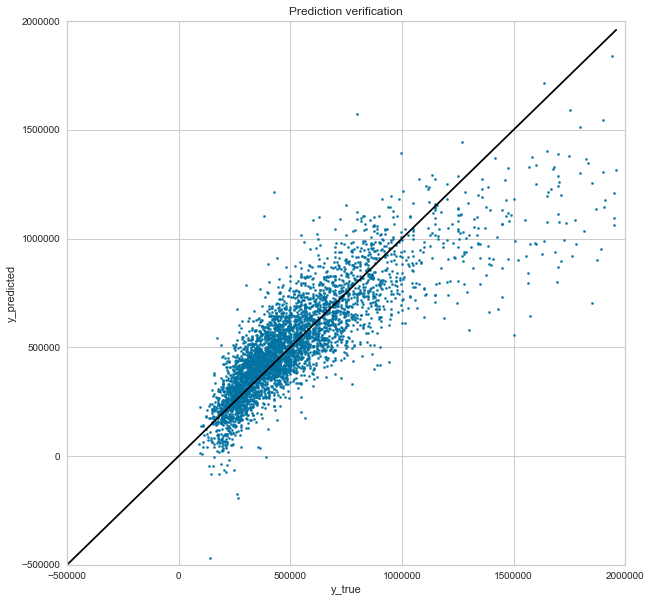

In [170]:
# Plot a scatter plot plt.scatter(y_true, y_predicted) for test observations
x_identity = np.linspace(-500000, max(y_test))
clf_las = Lasso(alpha = clf_L.alpha_).fit(X_train_scaled, y_train)
plt.figure(figsize=(10,10))
plt.scatter(y_test, clf_las.predict(X_test_scaled), s=5)
plt.plot(x_identity, x_identity, color='black')
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.xlim(-500000,2000000)
plt.ylim(-500000,2000000)
plt.title("Prediction verification")
plt.show()
# We can see that our prediction works rather nice with lower prices (0 - 1 billion),
# but then prediction gives lower estimate of the real price.
# K P A C U B O